In [2]:
import wilson
import square_graph
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
graph = square_graph.SquareWilson(90, standardweights=False)
q_list, q_prime_list, graph_list = wilson.multiresolution(graph,steps=6)
vmax=graph.get_maximum_value()
vmin=graph.get_minimum_value()
vmax=max(vmax,-vmin)
vmin=min(vmin,-vmax)

In [3]:
q_list

[390.5,
 384.09999999999997,
 354.1049686378329,
 337.5266025306348,
 300.1588706665459,
 276.3867057488869]

In [4]:
q_prime_list

[1871.774543911752,
 2064.2847251470666,
 2045.5193725466372,
 2121.8565018063864,
 2026.835842158504,
 1820.060304725751]

In [5]:
graph_list

18859.980454184606
-11936.925478478623

18220.058342734894
-11936.795195068351

18010.874576331495
-11936.579335190168

17854.724289997746
-11936.272746910909

17292.50220014907
-11935.932658380036

16869.99413702119
-11935.536024089295



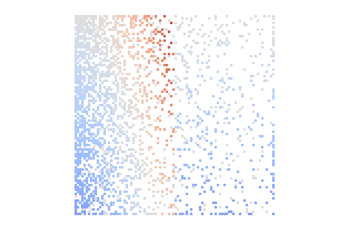

In [10]:
for g in graph_list:
    print(g.get_maximum_value())
    print(g.get_minimum_value())
    print('')
for i,g in enumerate(graph_list):
    g.create_pdf(f'analyzed_graph{i+1}.png',color_using_roots=False,vmax=vmax,vmin=vmin, colorbar=False,node_size=3)

In [7]:
reconstr_graph_list=wilson.multi_reconstr(graph_list, q_prime_list)

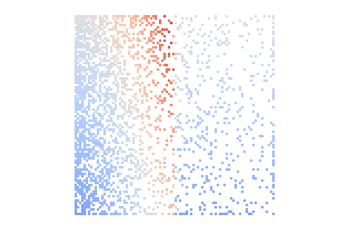

In [9]:
for i,g in enumerate(reconstr_graph_list):
    g.create_pdf(f'reconstr_graph{i+1}.png',color_using_roots=False,vmax=vmax,vmin=vmin,colorbar=False,node_size=3)

In [47]:
from scipy.sparse import csc_matrix

In [2]:
from scipy.sparse.linalg import inv

In [3]:
A = csc_matrix([[1., 0.], [1., 2.]])
A

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Column format>

In [4]:
Ainv = inv(A)
Ainv

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Column format>

In [5]:
import scipy

In [6]:
B=csc_matrix([[5.,9.]])
B

<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Column format>

In [7]:
B@A

<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Column format>

In [8]:
A@B

ValueError: dimension mismatch

In [16]:
M=csc_matrix([[.3]])
invM=inv(M)
print(type(invM))
print(type(M))
invM.shape

<class 'numpy.ndarray'>
<class 'scipy.sparse.csc.csc_matrix'>


(1,)

In [10]:
invM=invM.reshape((1,1))

In [11]:
type(invM)

numpy.ndarray

In [13]:
A_=A.reshape((2,2))
A_

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Column format>

In [14]:
type(A_)

scipy.sparse.csc.csc_matrix

[0.1306813000001057, 0.13898589999985234, 0.2013601999999537, 0.26826359999995475, 0.3242002000001776, 0.3951332999999977, 0.5318431000000601, 0.772549300000037, 0.8285270000001219, 0.8104851999999028, 1.073111899999958, 1.1869968000000881, 1.6069376000000375, 1.75578459999997, 1.8243348000000879]


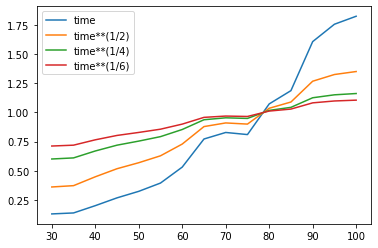

In [26]:
def runtime_test_Schur_complement(nlist = [30,35, 40,45, 50,55, 60,65, 70,75, 80,85, 90,95, 100]):
    tlist = []
    for n in nlist:
        g = square_graph.SquareWilson(n, standardweights=False)
        g.wilson(1.23456)
        q, _ = g._find_q(theta_1=.2, theta_2=1.)
        g.wilson(q)
        temp = time.perf_counter()
        g.compute_Schur_complement()
        tlist.append(time.perf_counter() - temp)
    
    nlist = np.array(nlist)
    tlist = np.array(tlist)
    plt.plot(nlist, tlist, label='time')
    plt.plot(nlist, tlist ** (1 / 2), label='time**(1/2)')
    plt.plot(nlist, tlist ** (1 / 4), label='time**(1/4)')
    plt.plot(nlist, tlist ** (1 / 6), label='time**(1/6)')
    plt.legend()
    plt.show()
    return (nlist,tlist)

nlist,tlist=runtime_test_Schur_complement()

In [12]:
tlist
nlist=np.array(nlist)

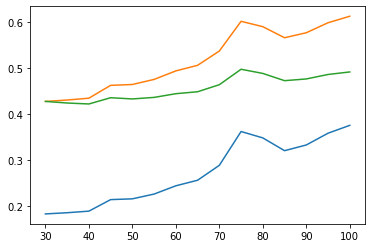

In [14]:
plt.plot(nlist, (tlist/tlist[0])**(1/2)/nlist**(1/2),label='time**(1/2)')
plt.plot(nlist, (tlist/tlist[0]) **(1/4)/nlist**(1/4),label='time**(1/4)')
plt.plot(nlist, (tlist/tlist[0]) **(1/6)/nlist**(1/4),label='time**(1/6)')

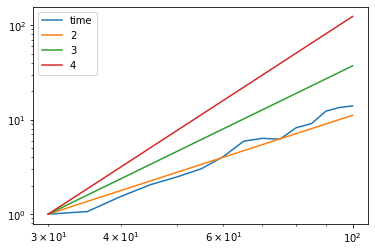

In [27]:
plt.loglog(nlist,tlist/tlist[0],label='time')
plt.loglog(nlist,(nlist/nlist[0])**2,label='2')
plt.loglog(nlist,(nlist/nlist[0])**3,label='3')
plt.loglog(nlist,(nlist/nlist[0])**4,label='4')
plt.legend()

In [20]:
tlist[0]/nlist[0]*nlist

array([0.1459455 , 0.17026975, 0.194594  , 0.21891825, 0.2432425 ,
       0.26756675, 0.291891  , 0.31621525, 0.3405395 , 0.36486375,
       0.389188  , 0.41351225, 0.4378365 , 0.46216075, 0.486485  ])

In [21]:
tlist

array([0.1459455, 0.1751435, 0.2077135, 0.2998849, 0.3385403, 0.4091852,
       0.5202501, 0.6209561, 0.8490457, 1.4329571, 1.4133698, 1.2713347,
       1.4526794, 1.7783968, 2.0549663])

In [32]:
g=square_graph.SquareWilson(100)
%prun g.wilson(2.3)

         1681282 function calls in 1.138 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   142544    0.104    0.000    0.298    0.000 reportviews.py:1003(__init__)
   142544    0.093    0.000    0.391    0.000 digraph.py:839(edges)
    11328    0.092    0.000    0.452    0.000 wilson.py:667(follow_arrow_if_exist_else_create_arrow_and_follow_or_get_killed)
    10000    0.085    0.000    0.397    0.000 wilson.py:245(get_node_weight)
   142544    0.082    0.000    0.115    0.000 digraph.py:342(succ)
   132543    0.080    0.000    0.100    0.000 reportviews.py:1025(__getitem__)
   142544    0.079    0.000    0.195    0.000 {built-in method builtins.hasattr}
        1    0.067    0.067    1.137    1.137 wilson.py:606(stack_version_of_wilson)
   214908    0.049    0.000    0.049    0.000 coreviews.py:44(__init__)
    49600    0.039    0.000    0.049    0.000 reportviews.py:726(<genexpr>)
     7164    0.035    0.000    0.119    0

In [33]:
%prun g.set_weights()

         576409 function calls in 0.492 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.092    0.000    0.442    0.000 wilson.py:245(get_node_weight)
    49600    0.047    0.000    0.129    0.000 reportviews.py:1003(__init__)
    49600    0.043    0.000    0.056    0.000 reportviews.py:726(<genexpr>)
    49600    0.038    0.000    0.167    0.000 digraph.py:839(edges)
    49600    0.035    0.000    0.049    0.000 digraph.py:342(succ)
    49600    0.033    0.000    0.082    0.000 {built-in method builtins.hasattr}
    39600    0.028    0.000    0.035    0.000 reportviews.py:1025(__getitem__)
    10000    0.027    0.000    0.053    0.000 reportviews.py:698(__init__)
        1    0.024    0.024    0.492    0.492 wilson.py:21(set_weights)
    49600    0.014    0.000    0.014    0.000 coreviews.py:44(__init__)
    10000    0.014    0.000    0.021    0.000 graph.py:1863(nbunch_iter)
    10000    0.012    0.000    0.

In [42]:
%prun g.compute_Schur_complement()

         2925761 function calls (2914079 primitive calls) in 7.879 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5836    3.731    0.001    3.731    0.001 {method 'solve' of 'SuperLU' objects}
     5836    0.408    0.000    0.408    0.000 {method 'nonzero' of 'numpy.ndarray' objects}
        4    0.281    0.070    0.771    0.193 wilson.py:437(create_Laplacian)
    29232    0.198    0.000    0.576    0.000 sputils.py:131(get_index_dtype)
99328/87656    0.186    0.000    0.759    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
   169491    0.176    0.000    0.176    0.000 {built-in method numpy.array}
    11694    0.148    0.000    0.604    0.000 compressed.py:136(check_format)
        1    0.132    0.132    6.910    6.910 linsolve.py:91(spsolve)
    58464    0.129    0.000    0.129    0.000 getlimits.py:514(__init__)
11694/11684    0.108    0.000    1.244    0.000 compressed.py:27(__init__

In [41]:

%prun g.analysis_operator(1.23456789)

         1133417 function calls (1133411 primitive calls) in 0.797 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.218    0.218    0.621    0.621 wilson.py:437(create_Laplacian)
   149206    0.114    0.000    0.153    0.000 graph.py:661(nodes)
   149200    0.075    0.000    0.097    0.000 reportviews.py:187(__getitem__)
        1    0.060    0.060    0.060    0.060 {built-in method scipy.sparse.linalg.dsolve._superlu.gssv}
   149206    0.038    0.000    0.038    0.000 reportviews.py:177(__init__)
    39600    0.029    0.000    0.086    0.000 reportviews.py:1003(__init__)
   188841    0.027    0.000    0.027    0.000 {built-in method builtins.isinstance}
    39600    0.027    0.000    0.113    0.000 digraph.py:839(edges)
        1    0.025    0.025    0.797    0.797 wilson.py:505(analysis_operator)
    39603    0.024    0.000    0.057    0.000 {built-in method builtins.hasattr}
    39600    0.024    0.000    0

In [44]:
%prun -s tottime g.reconstruction_operator(1.23456789)

L_Schur.shape=(4164, 4164)
type(L_Schur)=<class 'scipy.sparse.csc.csc_matrix'>
L_Schur.data=array([ 2.28465946e-08,  2.28465946e-08,  3.93308335e-05, ...,
       -3.34635199e+00,  1.00000034e+00,  1.11316306e+00])
f[:m].shape=(4164,)
f_bar.shape=(4164,)
(1 / q * L_Schur.dot(f_bar)).shape=(4164,)
 

         3879557 function calls (3867859 primitive calls) in 8.487 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     5836    3.667    0.001    3.667    0.001 {method 'solve' of 'SuperLU' objects}
        7    0.484    0.069    1.325    0.189 wilson.py:437(create_Laplacian)
     5836    0.407    0.000    0.407    0.000 {method 'nonzero' of 'numpy.ndarray' objects}
    29257    0.195    0.000    0.568    0.000 sputils.py:131(get_index_dtype)
99381/87709    0.195    0.000    0.761    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
   232670    0.193    0.000    0.259    0.000 graph.py:661(nodes)
   169608    0.192    0.000    0.192    0.000 {built-in method numpy.array}
    11705    0.144    0.000    0.595    0.000 compressed.py:136(check_format)
   232644    0.142    0.000    0.178    0.000 reportviews.py:187(__getitem__)
    58514    0.126    0.000    0.126    0.000 getlimits.py:514(__init__)

L_Schur.shape=(653, 653)
type(L_Schur)=<class 'scipy.sparse.csc.csc_matrix'>
L_Schur.data=array([  1. ,  29.1, -30.1, ...,  11.6,  12.6,  12.5])
f[:m].shape=(653,)
f_bar.shape=(653,)
(1 / q * L_Schur.dot(f_bar)).shape=(653,)
L_Schur.shape=(875, 875)
type(L_Schur)=<class 'scipy.sparse.csc.csc_matrix'>
L_Schur.data=array([ 0.96651493,  1.00204857,  3.8278579 , ..., 11.6       ,
       12.6       , 12.5       ])
f[:m].shape=(875,)
f_bar.shape=(875,)
(1 / q * L_Schur.dot(f_bar)).shape=(875,)
L_Schur.shape=(1150, 1150)
type(L_Schur)=<class 'scipy.sparse.csc.csc_matrix'>
L_Schur.data=array([1.33914365e-02, 1.30099141e-02, 3.37355797e-03, ...,
       9.20000000e+00, 9.20000000e+00, 9.10000000e+00])
f[:m].shape=(1150,)
f_bar.shape=(1150,)
(1 / q * L_Schur.dot(f_bar)).shape=(1150,)
L_Schur.shape=(1471, 1471)
type(L_Schur)=<class 'scipy.sparse.csc.csc_matrix'>
L_Schur.data=array([ 30.1       ,  29.1       ,  30.1       , ...,   3.66959578,
       -45.11168624,  13.6       ])
f[:m].shape=(1471,)


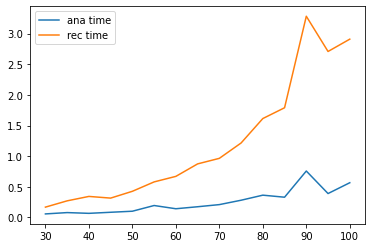

In [39]:
def runtime_test_ana_rec_operator(nlist = [30,35, 40,45, 50,55, 60,65, 70,75, 80,85, 90,95, 100]):
    alist = []
    rlist = []
    for n in nlist:
        g = square_graph.SquareWilson(n, standardweights=False)
        g.wilson(1.23456)
        q, _ = g._find_q(theta_1=.2, theta_2=1.)
        g.wilson(q)
        temp = time.perf_counter()
        g.analysis_operator(1.23456789)
        alist.append(time.perf_counter() - temp)
        temp = time.perf_counter()
        g.reconstruction_operator(1.23456789)
        rlist.append(time.perf_counter() - temp)
    nlist = np.array(nlist)
    rlist = np.array(rlist)
    alist = np.array(alist)
    plt.plot(nlist, alist, label='ana time')
    plt.plot(nlist, rlist, label='rec time')
    plt.legend()
    plt.show()
    return (nlist,alist,rlist)

nlist,alist,rlist=runtime_test_ana_rec_operator()

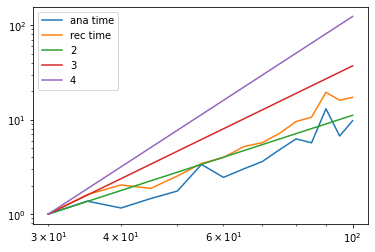

In [40]:
plt.loglog(nlist,alist/alist[0],label='ana time')
plt.loglog(nlist,rlist/rlist[0],label='rec time')
plt.loglog(nlist,(nlist/nlist[0])**2,label='2')
plt.loglog(nlist,(nlist/nlist[0])**3,label='3')
plt.loglog(nlist,(nlist/nlist[0])**4,label='4')
plt.legend()

[10.788519900000011, 19.176563700000003, 25.084974499999987, 39.99908209999998, 64.91879920000002, 105.12240529999997, 145.74127040000002, 163.09563559999992, 218.56461410000009, 272.52809179999997, 442.26400349999994, 473.3677806999999, 719.7125437, 890.8937778, 1000.6646519000001]


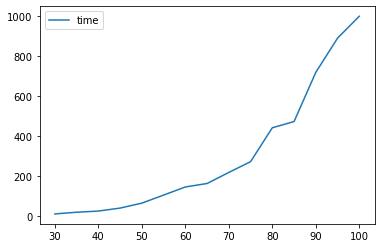

In [2]:
def runtime_test_multi(nlist = [30,35, 40,45, 50,55, 60,65, 70,75, 80,85, 90,95, 100]):
    tlist = []
    for n in nlist:
        g = square_graph.SquareWilson(n, standardweights=False)
        g.wilson(1.23456)
        q, _ = g._find_q(theta_1=.2, theta_2=1.)
        g.wilson(q)
        temp = time.perf_counter()
        wilson.multiresolution(g)
        tlist.append(time.perf_counter() - temp)
    print(tlist)
    nlist = np.array(nlist)
    tlist = np.array(tlist)
    plt.plot(nlist, tlist, label='time')
    plt.legend()
    plt.show()
    return (nlist,tlist)

nlist,tlist=runtime_test_multi()
# tlist=[10.788519900000011, 19.176563700000003, 25.084974499999987, 39.99908209999998, 64.91879920000002, 105.12240529999997, 145.74127040000002, 163.09563559999992, 218.56461410000009, 272.52809179999997, 442.26400349999994, 473.3677806999999, 719.7125437, 890.8937778, 1000.6646519000001]

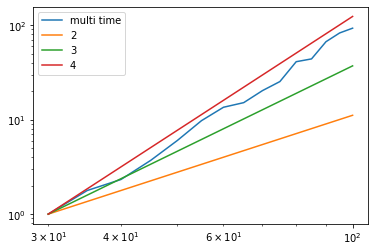

In [4]:
plt.loglog(nlist,tlist/tlist[0],label='multi time')
plt.loglog(nlist,(nlist/nlist[0])**2,label='2')
plt.loglog(nlist,(nlist/nlist[0])**3,label='3')
plt.loglog(nlist,(nlist/nlist[0])**4,label='4')
plt.legend()

In [6]:
g50=square_graph.SquareWilson(50,standardweights=False)
%prun -s cumtime wilson.multiresolution(g50)

         218558590 function calls (204966977 primitive calls) in 162.135 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000  162.135  162.135 {built-in method builtins.exec}
        1    0.631    0.631  162.135  162.135 <string>:1(<module>)
        1    0.489    0.489  161.503  161.503 wilson.py:695(multiresolution)
        5    0.081    0.016  137.578   27.516 wilson.py:605(one_step_in_multiresolution_scheme)
        5    0.057    0.011   71.487   14.297 wilson.py:589(_find_q_prime)
        5    2.576    0.515   65.360   13.072 wilson.py:736(create_graph_from_matrix)
  1827524    3.359    0.000   58.614    0.000 _index.py:32(__getitem__)
  1827524    5.276    0.000   50.665    0.000 _index.py:127(_validate_indices)
12053804/5489   21.827    0.000   46.377    0.008 copy.py:128(deepcopy)
    32/11    0.001    0.000   46.337    4.212 copy.py:258(_reconstruct)
1525677/11    9.216    0.000   46.337   

In [3]:
g100=square_graph.SquareWilson(100,standardweights=False)
g100.wilson(1.23456)
q,_=g100._find_q(.2,1.)
g100.wilson(q)
print(q)
print(len(g100.roots))
L_Schur=g100.compute_Schur_complement()


434.5
7110


In [4]:
%load_ext line_profiler
%lprun -f wilson.create_graph_from_matrix wilson.create_graph_from_matrix(L_Schur, g100)

Timer unit: 1e-07 s

Total time: 6.9233 s
File: C:\Users\oskar\PycharmProjects\multiresolution_scheme\wilson.py
Function: create_graph_from_matrix at line 742

Line #      Hits         Time  Per Hit   % Time  Line Contents
   742                                           def create_graph_from_matrix(mat, original_graph=None):
   743         1        436.0    436.0      0.0      g = WilsonGraph()
   744         1         23.0     23.0      0.0      if original_graph is None:
   745                                                   raise Exception('Procedure not yet written')
   746         1         12.0     12.0      0.0      if original_graph is not None:
   747      7111      75307.0     10.6      0.1          for node in original_graph.roots:
   748      7110     464800.0     65.4      0.7              g.add_node(node)
   749     42660     716890.0     16.8      1.0              for attr in original_graph.nodes[node]:
   750     35550    3025166.0     85.1      4.4                  

In [5]:
dg=wilson.create_graph_from_matrix(L_Schur, g100)

In [12]:
import copy

In [13]:
%time dgc=copy.deepcopy(dg)

Wall time: 1.99 s


In [6]:
%lprun -f g100._find_q g100._find_q(.2,1.)

Timer unit: 1e-07 s

Total time: 6.04847 s
File: C:\Users\oskar\PycharmProjects\multiresolution_scheme\wilson.py
Function: _find_q at line 573

Line #      Hits         Time  Per Hit   % Time  Line Contents
   573                                               def _find_q(self, theta_1, theta_2):
   574         1         96.0     96.0      0.0          qmax, q_stop = theta_2 * self.graph['alpha'], theta_1 * self.graph['alpha']
   575         1         21.0     21.0      0.0          q = qmax
   576         1         19.0     19.0      0.0          minimizer_q = qmax
   577         1    9275292.0 9275292.0     15.3          self.stack_version_of_wilson(qmax, renumber_roots_after_finishing=False, start_from_scratch=True)
   578         1        211.0    211.0      0.0          temp = self.alpha_bar_approx(q) * self.gamma_inverse_approx(q)
   579         1       4766.0   4766.0      0.0          minimizer_root_set = copy.copy(self.roots)
   580      5175      88554.0     17.1      0.1     

In [10]:
dg.wilson(1.23456)
q,_=dg._find_q(.2,1.)
dg.wilson(q)
print(q)
print(len(dg.roots))
L_Schur=dg.compute_Schur_complement()

431.29999999999995
5268


In [11]:
%lprun -f wilson.create_graph_from_matrix wilson.create_graph_from_matrix(L_Schur, dg)

Timer unit: 1e-07 s

Total time: 254.628 s
File: C:\Users\oskar\PycharmProjects\multiresolution_scheme\wilson.py
Function: create_graph_from_matrix at line 742

Line #      Hits         Time  Per Hit   % Time  Line Contents
   742                                           def create_graph_from_matrix(mat, original_graph=None):
   743         1        232.0    232.0      0.0      g = WilsonGraph()
   744         1         14.0     14.0      0.0      if original_graph is None:
   745                                                   raise Exception('Procedure not yet written')
   746         1          6.0      6.0      0.0      if original_graph is not None:
   747      5269      43154.0      8.2      0.0          for node in original_graph.roots:
   748      5268     288667.0     54.8      0.0              g.add_node(node)
   749     31608     473392.0     15.0      0.0              for attr in original_graph.nodes[node]:
   750     26340    1884230.0     71.5      0.1                 

In [19]:
arr=L_Schur.toarray()
nparr=np.array(arr)
np.sum(nparr>0)

2350230

In [23]:
np.sum(nparr<=0)

25401594

In [21]:
L_Schur=dg.compute_Schur_complement()
L_Schur

<5268x5268 sparse matrix of type '<class 'numpy.float64'>'
	with 2355498 stored elements in Compressed Sparse Column format>

In [18]:
mygraph=square_graph.SquareWilson(30)
mygraph.wilson(1.2334)
mygraph.add_edge('2,5','3,6',weight=10,hidden=False)
mygraph.show('mygraph.html')

In [29]:
%timeit mygraph.add_edge('2,5','3,6',weight=10,hidden=False)

2.08 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
%timeit L_Schur[3,7]

33.9 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [32]:
test_dict={'a':'2,5','b':'3,6'}
e=('a','b')

In [22]:
import scipy
LSc=scipy.sparse.dok_matrix(L_Schur)

In [25]:
%timeit LSc[3,4]

19.9 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [33]:
%timeit mygraph.add_edge(test_dict[e[0]],test_dict[e[1]],weight=LSc[3,4],hidden=False)

20.1 µs ± 577 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


(array([1.5000000e+01, 3.0500000e+03, 1.4524700e+05, 2.0718250e+06,
        9.0646560e+06, 1.2490711e+07, 5.4504700e+06, 7.4253100e+05,
        3.1075000e+04, 4.2000000e+02]),
 array([-5.970541  , -4.83950613, -3.70847126, -2.57743639, -1.44640153,
        -0.31536666,  0.81566821,  1.94670308,  3.07773795,  4.20877281,
         5.33980768]),
 <BarContainer object of 10 artists>)

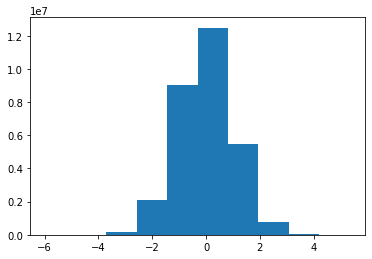

In [45]:
plt.hist(np.random.standard_normal(30_000_000),10)


TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

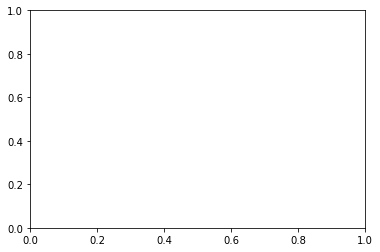

In [48]:
plt.hist(csc_matrix([[1., 0.], [1., 2.]]),10)

In [49]:
arr=LSc.toarray()
arr

array([[-2.19050413e+02,  0.00000000e+00,  5.06496312e-35, ...,
         0.00000000e+00,  1.14929220e-60,  0.00000000e+00],
       [ 0.00000000e+00, -8.81000000e+01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.06496312e-35,  0.00000000e+00, -2.53494865e+02, ...,
         0.00000000e+00,  5.70983590e-48,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.63542857e+01,  0.00000000e+00,  0.00000000e+00],
       [ 1.14929220e-60,  0.00000000e+00,  5.70983590e-48, ...,
         0.00000000e+00, -2.39552672e+02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.67170760e+01]])

In [70]:
logarr=np.log(arr)

C:\Users\oskar\AppData\Local\Temp/ipykernel_15168/3795680862.py:1: RuntimeWarning: divide by zero encountered in log
  logarr=np.log(arr)
C:\Users\oskar\AppData\Local\Temp/ipykernel_15168/3795680862.py:1: RuntimeWarning: invalid value encountered in log
  logarr=np.log(arr)


In [77]:
print(np.nanmin(logarr),np.nanmax(logarr))

In [78]:
logarr

array([[          nan,          -inf,  -78.9681314 , ...,          -inf,
        -138.01595931,          -inf],
       [         -inf,           nan,          -inf, ...,          -inf,
                 -inf,          -inf],
       [ -78.9681314 ,          -inf,           nan, ...,          -inf,
        -108.78189418,          -inf],
       ...,
       [         -inf,          -inf,          -inf, ...,           nan,
                 -inf,          -inf],
       [-138.01595931,          -inf, -108.78189418, ...,          -inf,
                  nan,          -inf],
       [         -inf,          -inf,          -inf, ...,          -inf,
                 -inf,           nan]])

In [83]:
s,e=np.histogram(logarr,100,range=(-200,100))

In [84]:
mitte=.5*e[:-1]+.5*e[1:]

<BarContainer object of 100 artists>

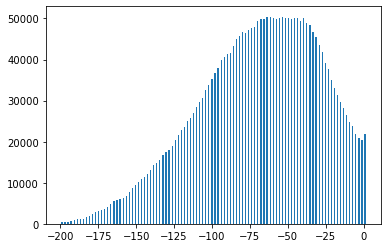

In [92]:
plt.bar(mitte,s)

In [93]:
np.exp(-100)

3.720075976020836e-44

In [94]:
type(arr[4,6])

numpy.float64

In [101]:
np.sum(arr >= .001)

118816

In [96]:
np.sum(arr < 10e-18)

26693875

In [98]:
n,_=arr.shape
n

5235

In [99]:
for i in range(n):
    arr[i,i]=0

In [102]:
arr.sum()

779430.9934452197

In [103]:
arr=arr

array([[ 0.48754757, -0.29989199,  0.23332222, -1.32336414, -1.61958177,
        -0.87208174],
       [-1.0166488 ,  0.71267812, -0.43939481,  0.08319786,  1.35782378,
         0.67844053],
       [ 1.0664536 , -1.85050887,  1.12840727, -0.4981952 , -0.19488186,
         0.3728797 ],
       [ 1.36582169, -0.11870643,  0.36339393,  0.44169085,  0.16699869,
        -0.2772034 ]])

In [105]:
np.sum(arr==0)

24681401

In [107]:
np.sum(arr[arr>0])

779430.9934452182

In [110]:
np.sum(arr[arr>1])

769188.3486753308

In [118]:
np.sum(arr>0)

2723824

In [117]:
np.sum(arr>=0)

27405225

In [114]:
np.sum(arr>10e-5)

146328

In [115]:
arr

array([[0.00000000e+00, 0.00000000e+00, 5.06496312e-35, ...,
        0.00000000e+00, 1.14929220e-60, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.06496312e-35, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.70983590e-48, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.14929220e-60, 0.00000000e+00, 5.70983590e-48, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [119]:
arr=arr[arr>10e-5]

In [120]:
arr

array([2.65073560e-03, 1.08494911e+01, 4.62080362e+00, ...,
       3.46504893e-01, 1.86512149e+00, 7.30000000e+00])

In [24]:
g100=square_graph.SquareWilson(100,standardweights=False)
g100.wilson(1.23456)
q,_=g100._find_q(.2,1.)
g100.wilson(q)
print(q)
print(len(g100.roots))
L_Schur0=g100.compute_Schur_complement()

434.5
7054


In [28]:
g1=wilson.create_graph_from_matrix(L_Schur0,g100)
g1.wilson(1.23456)
q,_=g1._find_q(.2,1.)
g1.wilson(q)
print(q)
print(len(g1.roots))
L_Schur1=g1.compute_Schur_complement()

429.29999999999995
5265


In [29]:
g2=wilson.create_graph_from_matrix(L_Schur1,g1)
g2.wilson(1.23456)
q,_=g2._find_q(.2,1.)
g2.wilson(q)
print(q)
print(len(g2.roots))
L_Schur2=g2.compute_Schur_complement()

417.2147290449378
4044


In [30]:
g3=wilson.create_graph_from_matrix(L_Schur2,g2)
g3.wilson(1.23456)
q,_=g3._find_q(.2,1.)
g3.wilson(q)
print(q)
print(len(g3.roots))
L_Schur3=g3.compute_Schur_complement()

404.9
3234


In [32]:
a0=np.array(L_Schur0.toarray())
a0

array([[-265.98117101,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -176.37113428,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        , -298.41548015, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -296.98287328,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
        -193.85588378,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        , -274.37080424]])

In [33]:
a1=np.array(L_Schur1.toarray())
a2=np.array(L_Schur2.toarray())
a3=np.array(L_Schur3.toarray())

In [36]:
np.sum(a1>0)

2063182

In [37]:
np.sum(a2>0)

4435380

In [38]:
np.sum(a3>0)

3914820

In [39]:
np.sum(a1<=0)

25657043

In [40]:
np.sum(a3<=0)

6543936

In [41]:
np.sum(a2<=0)

11918556

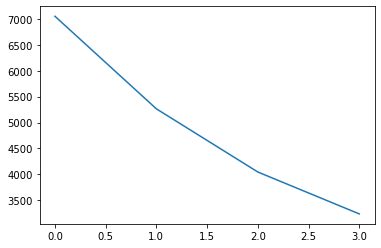

In [43]:
plt.plot([len(g100.roots),len(g1.roots),len(g2.roots),len(g3.roots)])

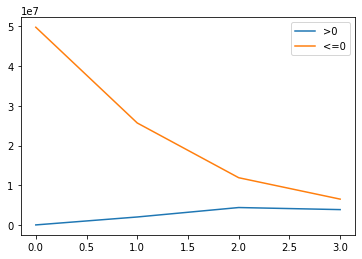

In [46]:
plt.plot([np.sum(a0>0),np.sum(a1>0),np.sum(a2>0),np.sum(a3>0)],label='>0')
plt.plot([np.sum(a0<=0),np.sum(a1<=0),np.sum(a2<=0),np.sum(a3<=0)],label='<=0')
plt.legend()

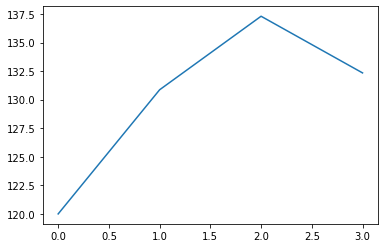

In [47]:
plt.plot([a0.max(),a1.max(),a2.max(),a3.max()])

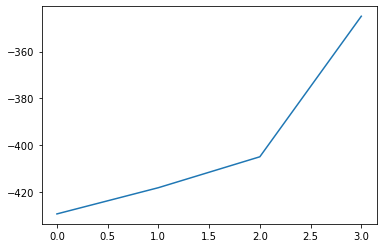

In [48]:
plt.plot([a0.min(),a1.min(),a2.min(),a3.min()])

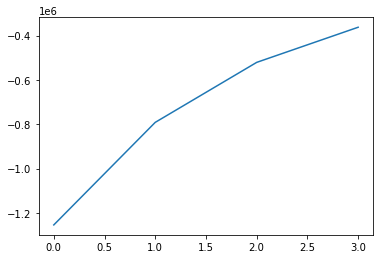

In [49]:
plt.plot([a0.trace(),a1.trace(),a2.trace(),a3.trace()])